##OKEAN grib utilities

OKEAN includes a very simle grib utilities module (okean.gribu) that relies on pygrib (or the older one, grib2). Grib files are a bit mysterious for people familiar with other formats like netcdf. So, gribu can be used to locate and extract variables.

First let's download some GFS grib file:

In [1]:
p='http://www.ftp.ncep.noaa.gov/data/nccf/com/gfs/prod/'
F=p+'gfs.2015072018/gfs.t18z.pgrb2b.1p00.f003'
import os
f='/tmp/files/'+os.path.basename(F)
if not os.path.isfile(f):
    os.system('wget -P /tmp/files/ '+F)
    
s=os.stat(f)
import datetime
d=datetime.datetime.fromtimestamp(s.st_ctime).strftime('%Y-%m-%d %H:%M')
print '>> %s %dM %s'%(f,s.st_size/1024**2,d)

>> /tmp/files/gfs.t18z.pgrb2b.1p00.f003 14M 2015-07-22 12:04


You can use gribu.show to list file contents:

In [2]:
from okean import gribu
gribu.show(f)

           name                      n vel   units     
gh         Geopotential height          27   gpm       
t          Temperature                  37   K         
r          Relative humidity            26   %         
u          u-component of wind          37   m s-1     
v          v-component of wind          37   m s-1     
absv       Absolute vorticity           21   s-1       
clwmr      Cloud mixing ratio           21   kg kg-1   
o3mr       192                           5   192       
q          Specific humidity            42   kg kg-1   
w          Vertical velocity [pressu    16   Pa s-1    
soill      192                           4   192       
cnwat      196                           1   196       
icetk      Ice thickness                 1   m         
duvb       194                           1   194       
cduvb      195                           1   195       
pres       Pressure                      6   Pa        
vwsh       192                           6   192

Locating variables:

In [3]:
a=gribu.findvar(f,'t')
print 'found',len(a)
for i in a[:5]: print str(i)[:90]
print '...'
for i in a[-3:]: print str(i)[:90]    

found 37
2:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 3 hrs:from 20150
10:Temperature:K (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 3 hrs:from 2015
18:Temperature:K (instant):regular_ll:isobaricInhPa:level 300 Pa:fcst time 3 hrs:from 2015
26:Temperature:K (instant):regular_ll:isobaricInhPa:level 500 Pa:fcst time 3 hrs:from 2015
34:Temperature:K (instant):regular_ll:isobaricInhPa:level 700 Pa:fcst time 3 hrs:from 2015
...
274:Temperature:K (instant):regular_ll:potentialVorticity:level 2.147484648 K m2 kg-1 s-1:
280:Temperature:K (instant):regular_ll:potentialVorticity:level 1.5e-06 K m2 kg-1 s-1:fcst
286:Temperature:K (instant):regular_ll:potentialVorticity:level 2.147485148 K m2 kg-1 s-1:


There are 37 "t" variables, one per level. But we can use also parts of the string representation to refine search:

In [4]:
gribu.findvar(f,'t','heightAboveSea')

[214:Temperature:K (instant):regular_ll:heightAboveSea:level 305 m:fcst time 3 hrs:from 201507201800,
 217:Temperature:K (instant):regular_ll:heightAboveSea:level 457 m:fcst time 3 hrs:from 201507201800,
 220:Temperature:K (instant):regular_ll:heightAboveSea:level 610 m:fcst time 3 hrs:from 201507201800,
 223:Temperature:K (instant):regular_ll:heightAboveSea:level 914 m:fcst time 3 hrs:from 201507201800,
 226:Temperature:K (instant):regular_ll:heightAboveSea:level 4572 m:fcst time 3 hrs:from 201507201800]

There are 5 "t" variables at z-const levels. Refining more...

In [5]:
gvar=gribu.findvar(f,'t','eightAboveSea:level 610 m','time 3')
print gvar

[220:Temperature:K (instant):regular_ll:heightAboveSea:level 610 m:fcst time 3 hrs:from 201507201800]


We located the variable... time to extract it:

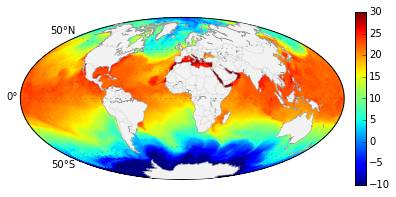

In [6]:
lon,lat,v=gribu.getvar(gvar) # or getvar(gvar[0])
# the arguments of findvar can also be used in getvar directly:
# gribu.findvar(f,'t',tags=('eightAboveSea:level 610 m','time 3'))

# doing some plot:
from okean import vis
%matplotlib inline
o=vis.Data(lon,lat,v-273.15)
o.config['colorbar.ax_position']=.875,.3,.025,.4
o.plot(proj__name='hammer',figsize=(6,6),meridians_add=0,clim=(-10,30))

And to extract some region:

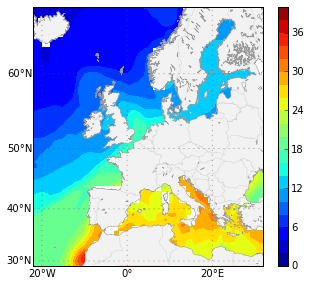

In [7]:
lon,lat,v=gribu.getvar(f,'t',tags=('610 m',),lons=(-20,30),lats=(30,65))
vis.Data(lon,lat,v-273.15).plot(figsize=(4.5,4.5),field__plot='contourf')

Yes, this is a very simple module. But extract and plot a portion of a variable from an obscure grib file  in two lines is quite handy.

- - -
##Links

- [okean](https://github.com/martalmeida/okean/)

- [okean documentation](https://github.com/martalmeida/okean/blob/master/okean_doc.ipynb) - documentation index

- - -
*mma 2015*  